In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [51]:
features = pd.read_csv('data.csv')

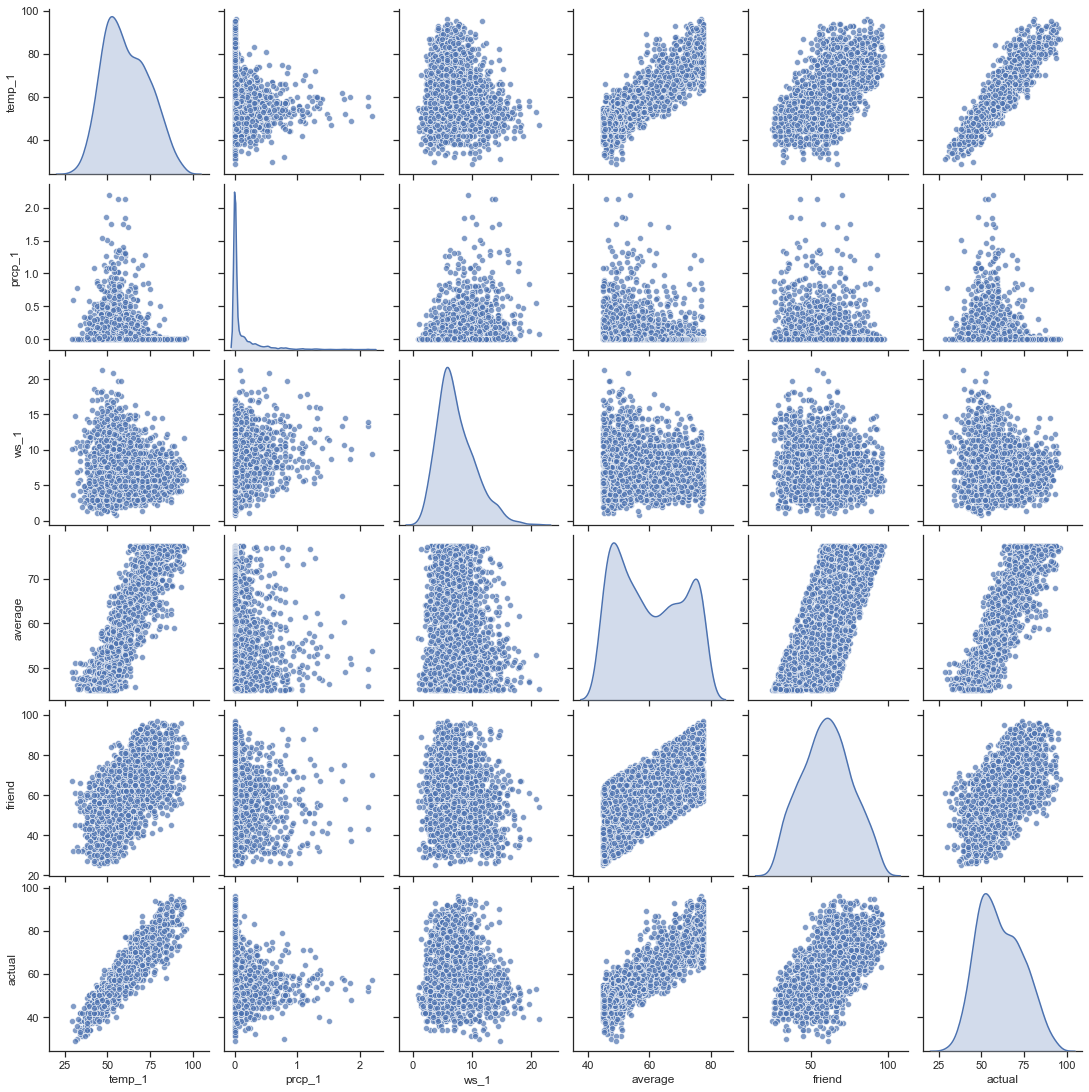

In [52]:
reduced_features = features[['temp_1', 'prcp_1', 'ws_1', 'average', 'friend', 'actual']]
sns.set(style="ticks", color_codes=True);
sns.pairplot(reduced_features, diag_kind = 'kde', plot_kws=dict(alpha = 0.7), diag_kws=dict(shade=True))

In [53]:
features = pd.get_dummies(features)
print(features.shape)
labels = np.array(features['actual'])
features= features.drop('actual', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

(2191, 18)


In [54]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [55]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1752, 17)
Training Labels Shape: (1752,)
Testing Features Shape: (439, 17)
Testing Labels Shape: (439,)


In [56]:
rf = RandomForestRegressor(n_estimators= 10000, random_state=100)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [57]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 3.73 degrees.
Accuracy: 93.71 %.


In [60]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print(pair) for pair in feature_importances]

('temp_1', 0.84)
('average', 0.06)
('ws_1', 0.02)
('temp_2', 0.02)
('friend', 0.02)
('year', 0.01)
('month', 0.01)
('day', 0.01)
('prcp_1', 0.01)
('snwd_1', 0.0)
('weekday_Fri', 0.0)
('weekday_Mon', 0.0)
('weekday_Sat', 0.0)
('weekday_Sun', 0.0)
('weekday_Thurs', 0.0)
('weekday_Tues', 0.0)
('weekday_Wed', 0.0)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

NameError: name 'export_graphviz' is not defined

Variable: temp_1               Importance: 0.65
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.04
Variable: forecast_acc         Importance: 0.04
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


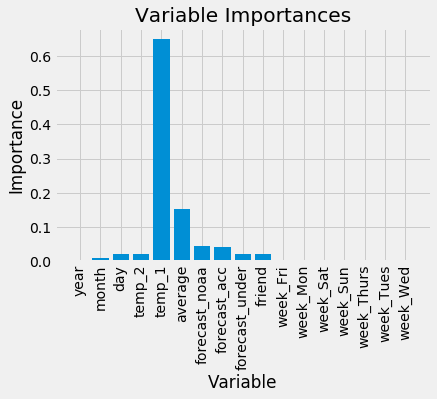

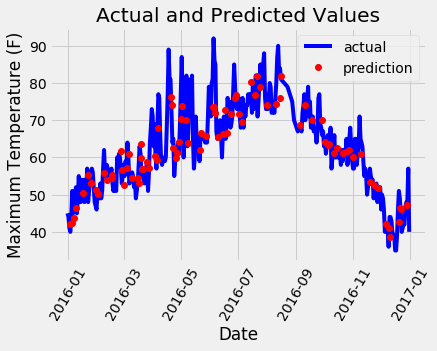